# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset lode

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [3]:
# check the missing value
df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [4]:
df['bedrooms'].median()

4.0

In [5]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

In [6]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


# Visualize the Data

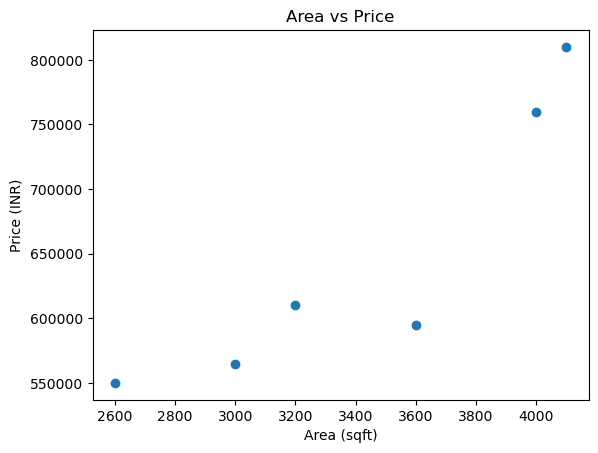

In [7]:
# Area vs Price
plt.scatter(df['area'], df['price'],)
plt.xlabel('Area (sqft)')
plt.ylabel('Price (INR)')
plt.title('Area vs Price')
plt.show()

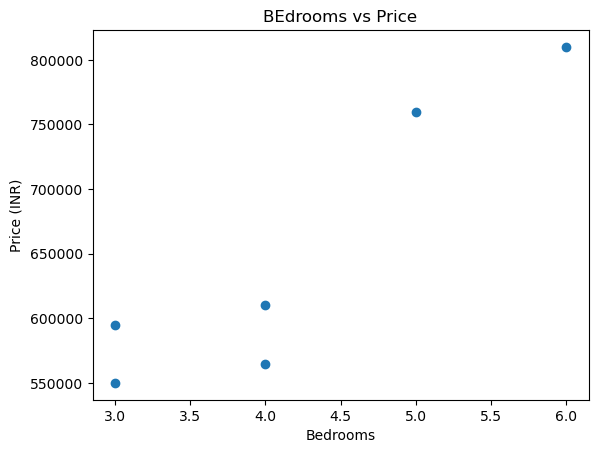

In [8]:
# Bedrooms vs Price
plt.scatter(df['bedrooms'], df['price'],)
plt.xlabel('Bedrooms')
plt.ylabel('Price (INR)')
plt.title('BEdrooms vs Price')
plt.show()

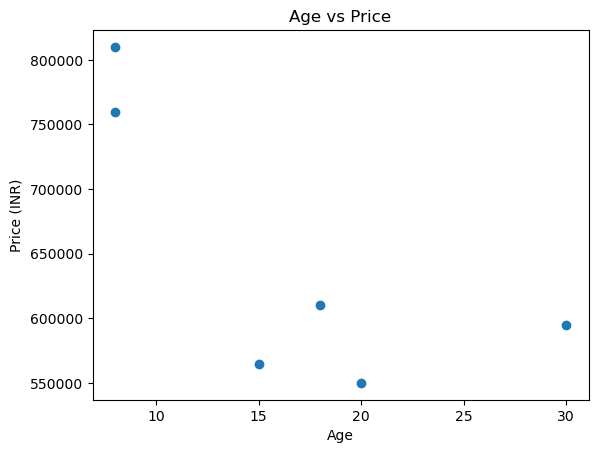

In [9]:
# Age vs Price
plt.scatter(df['age'], df['price'],)
plt.xlabel('Age')
plt.ylabel('Price (INR)')
plt.title('Age vs Price')
plt.show()

# Extract columns and Train test split

In [10]:
X = df.iloc[:,:3]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4, 3), (2, 3), (4,), (2,))

In [12]:
X_train

,area,bedrooms,age
5,4100,6.0,8
2,3200,4.0,18
4,4000,5.0,8
3,3600,3.0,30


In [13]:
y_train

5    810000
2    610000
4    760000
3    595000
Name: price, dtype: int64

# Train model

In [14]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression() 
LR.fit(X_train,y_train)

LinearRegression()

In [15]:
# Predict
y_pred = LR.predict(X_test)
y_pred 

array([498358.20895522, 592574.62686567])

------------
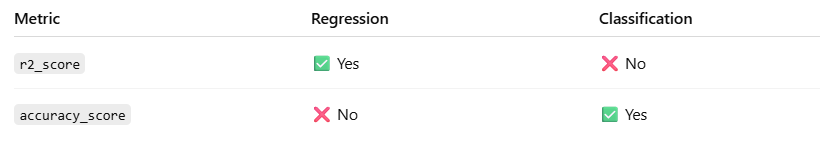

------------

In [16]:
# Accuracy (R² Score)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² score): {r2:.2f}")

Model Accuracy (R² score): -29.46


In [17]:
print("Intercept (b0):", LR.intercept_)
print("Coefficients (b1, b2, b3):", LR.coef_)

Intercept (b0): 120373.13432834996
Coefficients (b1, b2, b3): [  115.67164179 38432.8358209  -1902.98507463]


In [18]:
115.67164179*3000 + 38432.8358209*3 + -1902.98507463*40 + 120373.13432834996

506567.16417585

# Predict

In [19]:
# Predict price for new input
user_input = [[3000, 3, 40]]  # Example input: area=3000, bedrooms=3, age=40
predicted_price = LR.predict(user_input)

# Display the result
print(f"Predicted price : INR {predicted_price[0]:.2f}")

Predicted price : INR 506567.16


In [20]:
# Save